In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data/hacc.csv')
df.head()

,Charge Station Name,Session Initiated By,Start Time,End Time,Duration,Energy(kWh),Session Amount,Session Id,Port Type,Payment Mode
0,A,MOBILE,9/1/2018 7:25,9/1/2018 7:53,0:28:29,8.84,$4.77,3168811,CHADEMO,RFID
1,A,MOBILE,9/1/2018 8:03,9/1/2018 8:34,0:31:18,22.02,$11.89,3168847,CHADEMO,CREDITCARD
2,A,MOBILE,9/1/2018 10:24,9/1/2018 10:25,0:00:18,0.00,$0.00,3169011,CHADEMO,RFID
3,A,MOBILE,9/1/2018 10:26,9/1/2018 11:02,0:36:04,23.80,$11.66,3169015,CHADEMO,RFID
4,A,MOBILE,9/1/2018 11:07,9/1/2018 11:39,0:31:17,9.87,$4.84,3169054,CHADEMO,RFID


In [3]:
len(df)

10452

In [4]:
print(df.columns)
df.columns = ['name', 'session_type', 'start_time', 'end_time', 'duration', 'energy', 'amount', 'id', 'port_type', 'payment_mode']
print(df.columns)

Index(['Charge Station Name', 'Session Initiated By', 'Start Time', 'End Time',
       'Duration', 'Energy(kWh)', 'Session Amount', 'Session Id', 'Port Type',
       'Payment Mode'],
      dtype='object')
Index(['name', 'session_type', 'start_time', 'end_time', 'duration', 'energy',
       'amount', 'id', 'port_type', 'payment_mode'],
      dtype='object')


In [5]:
df.dtypes

name             object
session_type     object
start_time       object
end_time         object
duration         object
energy          float64
amount           object
id                int64
port_type        object
payment_mode     object
dtype: object

In [6]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

# Changes the payment amount to a raw float value instead of a string of the form "$X.XX"
df['amount'] = df['amount'].replace('[\$,]', '', regex=True).astype(float)
df.head()

,name,session_type,start_time,end_time,duration,energy,amount,id,port_type,payment_mode
0,A,MOBILE,2018-09-01 07:25:00,2018-09-01 07:53:00,0:28:29,8.84,4.77,3168811,CHADEMO,RFID
1,A,MOBILE,2018-09-01 08:03:00,2018-09-01 08:34:00,0:31:18,22.02,11.89,3168847,CHADEMO,CREDITCARD
2,A,MOBILE,2018-09-01 10:24:00,2018-09-01 10:25:00,0:00:18,0.00,0.00,3169011,CHADEMO,RFID
3,A,MOBILE,2018-09-01 10:26:00,2018-09-01 11:02:00,0:36:04,23.80,11.66,3169015,CHADEMO,RFID
4,A,MOBILE,2018-09-01 11:07:00,2018-09-01 11:39:00,0:31:17,9.87,4.84,3169054,CHADEMO,RFID


In [7]:
df[df['duration'].str.contains('-')]['duration']

1119    -15:-38:-1
Name: duration, dtype: object

## Data Errors
Types of errors found:
1. Positive energy, Zero amount -- Resolution: ?
2. Positive amount, Zero energy -- Resolution: ?

In [8]:
# Checking for any missing values
missing = df[(df['energy'] == 0) | (df['amount'] == 0)]
print(len(missing))
missing.head()

2158


,name,session_type,start_time,end_time,duration,energy,amount,id,port_type,payment_mode
2,A,MOBILE,2018-09-01 10:24:00,2018-09-01 10:25:00,0:00:18,0.0,0.0,3169011,CHADEMO,RFID
14,A,DEVICE,2018-09-01 20:19:00,2018-09-01 20:19:00,0:00:18,0.0,0.0,3169515,CHADEMO,CREDITCARD
15,A,DEVICE,2018-09-01 20:21:00,2018-09-01 20:21:00,0:00:18,0.0,0.0,3169516,CHADEMO,CREDITCARD
20,A,DEVICE,2018-09-02 12:11:00,2018-09-02 12:12:00,0:00:17,0.0,0.0,3170042,CHADEMO,CREDITCARD
21,A,DEVICE,2018-09-02 12:12:00,2018-09-02 12:13:00,0:00:18,0.0,0.0,3170043,CHADEMO,CREDITCARD


In [9]:
# Anyone who charges their car but doesn't pay is a "thief" -- correctable if we just use HECO formula?
# Question: Is this ALWAYS just a data issue or do some people actually get away without paying?
thieves = df[(df['energy'] > 0) & (df['amount'] == 0)]
print(len(thieves))
thieves.head()

404


,name,session_type,start_time,end_time,duration,energy,amount,id,port_type,payment_mode
688,A,DEVICE,2018-10-15 08:57:00,2018-10-15 09:01:00,0:04:03,1.03,0.0,3240471,CHADEMO,RFID
1119,A,DEVICE,2018-11-13 08:21:00,2018-11-12 16:43:00,-15:-38:-1,59.07,0.0,3288825,CHADEMO,CREDITCARD
1864,A,DEVICE,2019-01-09 16:01:00,2019-01-09 16:35:00,0:33:56,5.97,0.0,3385048,CHADEMO,CREDITCARD
1940,A,MOBILE,2019-01-13 08:07:00,2019-01-13 08:08:00,0:00:30,0.06,0.0,3391560,CHADEMO,RFID
1990,A,WEB,2019-01-15 10:46:00,2019-01-15 11:13:00,0:27:21,13.38,0.0,3395084,CHADEMO,RFID


In [10]:
# Anyone who used 0 energy but still paid got "jipped"
jipped = df[(df['energy'] == 0) & (df['amount'] > 0)]
print(len(jipped))
jipped.head()

0


,name,session_type,start_time,end_time,duration,energy,amount,id,port_type,payment_mode


In [11]:
dates = df['start_time'].dt.date
df['date'] = dates
df['date']

0        2018-09-01
1        2018-09-01
2        2018-09-01
3        2018-09-01
4        2018-09-01
5        2018-09-01
6        2018-09-01
7        2018-09-01
8        2018-09-01
9        2018-09-01
10       2018-09-01
11       2018-09-01
12       2018-09-01
13       2018-09-01
14       2018-09-01
15       2018-09-01
16       2018-09-01
17       2018-09-02
18       2018-09-02
19       2018-09-02
20       2018-09-02
21       2018-09-02
22       2018-09-02
23       2018-09-02
24       2018-09-02
25       2018-09-02
26       2018-09-02
27       2018-09-02
28       2018-09-02
29       2018-09-02
            ...    
10422    2019-08-29
10423    2019-08-29
10424    2019-08-29
10425    2019-08-29
10426    2019-08-29
10427    2019-08-30
10428    2019-08-30
10429    2019-08-30
10430    2019-08-30
10431    2019-08-30
10432    2019-08-30
10433    2019-08-30
10434    2019-08-30
10435    2019-08-30
10436    2019-08-30
10437    2019-08-30
10438    2019-08-31
10439    2019-08-31
10440    2019-08-31


In [12]:
df['day_of_week'] = df['start_time'].dt.day_name()
df['day_of_week']

0        Saturday
1        Saturday
2        Saturday
3        Saturday
4        Saturday
5        Saturday
6        Saturday
7        Saturday
8        Saturday
9        Saturday
10       Saturday
11       Saturday
12       Saturday
13       Saturday
14       Saturday
15       Saturday
16       Saturday
17         Sunday
18         Sunday
19         Sunday
20         Sunday
21         Sunday
22         Sunday
23         Sunday
24         Sunday
25         Sunday
26         Sunday
27         Sunday
28         Sunday
29         Sunday
           ...   
10422    Thursday
10423    Thursday
10424    Thursday
10425    Thursday
10426    Thursday
10427      Friday
10428      Friday
10429      Friday
10430      Friday
10431      Friday
10432      Friday
10433      Friday
10434      Friday
10435      Friday
10436      Friday
10437      Friday
10438    Saturday
10439    Saturday
10440    Saturday
10441    Saturday
10442    Saturday
10443    Saturday
10444    Saturday
10445    Saturday
10446    S

## Time of Day
Noting from his slides:

Times:
- On Peak: 5pm - 10pm => 17:00 - 22:00, Daily
- Mid Day: 9am - 5pm => 9:00 => 17:00, Daily
- Off Peak: 10pm - 9am => 22:00 - 9:00, Daily

Cost:
- On Peak: \$0.57
- Mid Day: \$0.49
- Off Peak: \$0.54


In [13]:
import datetime as dt
start_times = df['start_time'].dt.time
df['on_peak'] = (dt.time(17, 0, 0) <= start_times) & (start_times < dt.time(22, 0, 0))
df['mid_day'] = (dt.time(9, 0, 0) <= start_times) & (start_times < dt.time(17, 0, 0))
df['off_peak'] = (dt.time(22, 0, 0) <= start_times) | (start_times < dt.time(9, 0, 0))
df.head()

,name,session_type,start_time,end_time,duration,energy,amount,id,port_type,payment_mode,date,day_of_week,on_peak,mid_day,off_peak
0,A,MOBILE,2018-09-01 07:25:00,2018-09-01 07:53:00,0:28:29,8.84,4.77,3168811,CHADEMO,RFID,2018-09-01,Saturday,False,False,True
1,A,MOBILE,2018-09-01 08:03:00,2018-09-01 08:34:00,0:31:18,22.02,11.89,3168847,CHADEMO,CREDITCARD,2018-09-01,Saturday,False,False,True
2,A,MOBILE,2018-09-01 10:24:00,2018-09-01 10:25:00,0:00:18,0.00,0.00,3169011,CHADEMO,RFID,2018-09-01,Saturday,False,True,False
3,A,MOBILE,2018-09-01 10:26:00,2018-09-01 11:02:00,0:36:04,23.80,11.66,3169015,CHADEMO,RFID,2018-09-01,Saturday,False,True,False
4,A,MOBILE,2018-09-01 11:07:00,2018-09-01 11:39:00,0:31:17,9.87,4.84,3169054,CHADEMO,RFID,2018-09-01,Saturday,False,True,False


## Error Checking
Checking if each columns are in agreement with each other
1. Does cost match with the amount of energy for the given time period?

In [14]:
df['calculated_amount'] = df['energy'] * df['on_peak'] * 0.57 + df['energy'] * df['mid_day'] * 0.49 + df['energy'] * df['off_peak'] * 0.54
df['rounded_calculated_amount'] = np.round(df['calculated_amount'], 2)
correct = df[(df['amount'] == df['rounded_calculated_amount'])]
err = df[~(df['amount'] == df['rounded_calculated_amount'])]
correct.head()

,name,session_type,start_time,end_time,duration,energy,amount,id,port_type,payment_mode,date,day_of_week,on_peak,mid_day,off_peak,calculated_amount,rounded_calculated_amount
0,A,MOBILE,2018-09-01 07:25:00,2018-09-01 07:53:00,0:28:29,8.84,4.77,3168811,CHADEMO,RFID,2018-09-01,Saturday,False,False,True,4.7736,4.77
1,A,MOBILE,2018-09-01 08:03:00,2018-09-01 08:34:00,0:31:18,22.02,11.89,3168847,CHADEMO,CREDITCARD,2018-09-01,Saturday,False,False,True,11.8908,11.89
2,A,MOBILE,2018-09-01 10:24:00,2018-09-01 10:25:00,0:00:18,0.00,0.00,3169011,CHADEMO,RFID,2018-09-01,Saturday,False,True,False,0.0000,0.00
3,A,MOBILE,2018-09-01 10:26:00,2018-09-01 11:02:00,0:36:04,23.80,11.66,3169015,CHADEMO,RFID,2018-09-01,Saturday,False,True,False,11.6620,11.66
4,A,MOBILE,2018-09-01 11:07:00,2018-09-01 11:39:00,0:31:17,9.87,4.84,3169054,CHADEMO,RFID,2018-09-01,Saturday,False,True,False,4.8363,4.84


In [15]:
err[np.abs(err['amount'] - err['rounded_calculated_amount']) == 0.01]#[['amount', 'rounded_calculated_amount', 'calculated_amount']]

,name,session_type,start_time,end_time,duration,energy,amount,id,port_type,payment_mode,date,day_of_week,on_peak,mid_day,off_peak,calculated_amount,rounded_calculated_amount
3187,A,MOBILE,2019-03-19 09:34:00,2019-03-19 09:35:00,0:00:23,0.02,0.0,3524654,CHADEMO,RFID,2019-03-19,Tuesday,False,True,False,0.0098,0.01
3847,A,DEVICE,2019-04-28 17:46:00,2019-04-28 17:47:00,0:00:16,0.02,0.0,3616777,CHADEMO,CREDITCARD,2019-04-28,Sunday,True,False,False,0.0114,0.01
3998,A,DEVICE,2019-05-06 12:55:00,2019-05-06 12:55:00,0:00:20,0.03,0.0,3637871,CHADEMO,CREDITCARD,2019-05-06,Monday,False,True,False,0.0147,0.01
4046,A,MOBILE,2019-05-09 14:00:00,2019-05-09 14:00:00,0:00:17,0.02,0.0,3645870,CHADEMO,RFID,2019-05-09,Thursday,False,True,False,0.0098,0.01
4047,A,DEVICE,2019-05-09 14:16:00,2019-05-09 14:17:00,0:00:16,0.02,0.0,3645898,CHADEMO,CREDITCARD,2019-05-09,Thursday,False,True,False,0.0098,0.01
4048,A,DEVICE,2019-05-09 14:18:00,2019-05-09 14:18:00,0:00:17,0.02,0.0,3645899,CHADEMO,CREDITCARD,2019-05-09,Thursday,False,True,False,0.0098,0.01
4935,A,DEVICE,2019-06-23 20:25:00,2019-06-23 20:26:00,0:01:15,0.01,0.0,3759094,CHADEMO,CREDITCARD,2019-06-23,Sunday,True,False,False,0.0057,0.01
4962,A,DEVICE,2019-06-25 21:00:00,2019-06-25 21:00:00,0:00:13,0.01,0.0,3764555,CHADEMO,RFID,2019-06-25,Tuesday,True,False,False,0.0057,0.01
8008,B,DEVICE,2019-01-10 23:08:00,2019-01-10 23:09:00,0:00:16,0.02,0.0,3387845,CHADEMO,CREDITCARD,2019-01-10,Thursday,False,False,True,0.0108,0.01


In [16]:
err[np.abs(err['amount'] - err['rounded_calculated_amount']) > 1]

,name,session_type,start_time,end_time,duration,energy,amount,id,port_type,payment_mode,date,day_of_week,on_peak,mid_day,off_peak,calculated_amount,rounded_calculated_amount
1119,A,DEVICE,2018-11-13 08:21:00,2018-11-12 16:43:00,-15:-38:-1,59.07,0.00,3288825,CHADEMO,CREDITCARD,2018-11-13,Tuesday,False,False,True,31.8978,31.90
1864,A,DEVICE,2019-01-09 16:01:00,2019-01-09 16:35:00,0:33:56,5.97,0.00,3385048,CHADEMO,CREDITCARD,2019-01-09,Wednesday,False,True,False,2.9253,2.93
1945,A,WEB,2019-01-13 11:31:00,2019-01-13 12:01:00,0:30:09,16.84,0.04,3391786,CHADEMO,RFID,2019-01-13,Sunday,False,True,False,8.2516,8.25
1990,A,WEB,2019-01-15 10:46:00,2019-01-15 11:13:00,0:27:21,13.38,0.00,3395084,CHADEMO,RFID,2019-01-15,Tuesday,False,True,False,6.5562,6.56
2093,A,WEB,2019-01-20 06:25:00,2019-01-20 06:53:00,0:28:04,15.59,0.00,3402921,CHADEMO,RFID,2019-01-20,Sunday,False,False,True,8.4186,8.42
2101,A,WEB,2019-01-20 14:07:00,2019-01-20 14:38:00,0:31:16,20.18,0.40,3403348,CHADEMO,RFID,2019-01-20,Sunday,False,True,False,9.8882,9.89
2109,A,DEVICE,2019-01-20 17:14:00,2019-01-20 17:58:00,0:44:20,12.48,0.00,3403532,CHADEMO,RFID,2019-01-20,Sunday,True,False,False,7.1136,7.11
2110,A,DEVICE,2019-01-20 17:58:00,2019-01-20 18:34:00,0:35:19,4.09,0.00,3403561,CHADEMO,CREDITCARD,2019-01-20,Sunday,True,False,False,2.3313,2.33
2111,A,DEVICE,2019-01-20 18:34:00,2019-01-20 20:36:00,2:01:58,15.35,0.00,3403575,CHADEMO,CREDITCARD,2019-01-20,Sunday,True,False,False,8.7495,8.75
2161,A,WEB,2019-01-23 14:33:00,2019-01-23 15:02:00,0:29:17,18.67,0.00,3409736,CHADEMO,RFID,2019-01-23,Wednesday,False,True,False,9.1483,9.15


In [17]:
df = df.rename({'rounded_calculated_amount': 'correct_amount'}, axis=1)
df['error_rounding'] = np.abs(df['amount'] - df['correct_amount']) == 0.01
df['error_calculation'] = np.abs(df['amount'] - df['correct_amount']) > 0.01
df.head()

,name,session_type,start_time,end_time,duration,energy,amount,id,port_type,payment_mode,date,day_of_week,on_peak,mid_day,off_peak,calculated_amount,correct_amount,error_rounding,error_calculation
0,A,MOBILE,2018-09-01 07:25:00,2018-09-01 07:53:00,0:28:29,8.84,4.77,3168811,CHADEMO,RFID,2018-09-01,Saturday,False,False,True,4.7736,4.77,False,False
1,A,MOBILE,2018-09-01 08:03:00,2018-09-01 08:34:00,0:31:18,22.02,11.89,3168847,CHADEMO,CREDITCARD,2018-09-01,Saturday,False,False,True,11.8908,11.89,False,False
2,A,MOBILE,2018-09-01 10:24:00,2018-09-01 10:25:00,0:00:18,0.00,0.00,3169011,CHADEMO,RFID,2018-09-01,Saturday,False,True,False,0.0000,0.00,False,False
3,A,MOBILE,2018-09-01 10:26:00,2018-09-01 11:02:00,0:36:04,23.80,11.66,3169015,CHADEMO,RFID,2018-09-01,Saturday,False,True,False,11.6620,11.66,False,False
4,A,MOBILE,2018-09-01 11:07:00,2018-09-01 11:39:00,0:31:17,9.87,4.84,3169054,CHADEMO,RFID,2018-09-01,Saturday,False,True,False,4.8363,4.84,False,False


In [18]:
df[df['error_rounding']]

,name,session_type,start_time,end_time,duration,energy,amount,id,port_type,payment_mode,date,day_of_week,on_peak,mid_day,off_peak,calculated_amount,correct_amount,error_rounding,error_calculation
3187,A,MOBILE,2019-03-19 09:34:00,2019-03-19 09:35:00,0:00:23,0.02,0.0,3524654,CHADEMO,RFID,2019-03-19,Tuesday,False,True,False,0.0098,0.01,True,False
3847,A,DEVICE,2019-04-28 17:46:00,2019-04-28 17:47:00,0:00:16,0.02,0.0,3616777,CHADEMO,CREDITCARD,2019-04-28,Sunday,True,False,False,0.0114,0.01,True,False
3998,A,DEVICE,2019-05-06 12:55:00,2019-05-06 12:55:00,0:00:20,0.03,0.0,3637871,CHADEMO,CREDITCARD,2019-05-06,Monday,False,True,False,0.0147,0.01,True,False
4046,A,MOBILE,2019-05-09 14:00:00,2019-05-09 14:00:00,0:00:17,0.02,0.0,3645870,CHADEMO,RFID,2019-05-09,Thursday,False,True,False,0.0098,0.01,True,False
4047,A,DEVICE,2019-05-09 14:16:00,2019-05-09 14:17:00,0:00:16,0.02,0.0,3645898,CHADEMO,CREDITCARD,2019-05-09,Thursday,False,True,False,0.0098,0.01,True,False
4048,A,DEVICE,2019-05-09 14:18:00,2019-05-09 14:18:00,0:00:17,0.02,0.0,3645899,CHADEMO,CREDITCARD,2019-05-09,Thursday,False,True,False,0.0098,0.01,True,False
4935,A,DEVICE,2019-06-23 20:25:00,2019-06-23 20:26:00,0:01:15,0.01,0.0,3759094,CHADEMO,CREDITCARD,2019-06-23,Sunday,True,False,False,0.0057,0.01,True,False
4962,A,DEVICE,2019-06-25 21:00:00,2019-06-25 21:00:00,0:00:13,0.01,0.0,3764555,CHADEMO,RFID,2019-06-25,Tuesday,True,False,False,0.0057,0.01,True,False
8008,B,DEVICE,2019-01-10 23:08:00,2019-01-10 23:09:00,0:00:16,0.02,0.0,3387845,CHADEMO,CREDITCARD,2019-01-10,Thursday,False,False,True,0.0108,0.01,True,False


In [19]:
for col in ['session_type', 'port_type', 'payment_mode']:
    df[col] = df[col].astype('category')
df.dtypes

name                         object
session_type               category
start_time           datetime64[ns]
end_time             datetime64[ns]
duration                     object
energy                      float64
amount                      float64
id                            int64
port_type                  category
payment_mode               category
date                         object
day_of_week                  object
on_peak                        bool
mid_day                        bool
off_peak                       bool
calculated_amount           float64
correct_amount              float64
error_rounding                 bool
error_calculation              bool
dtype: object

In [20]:
preproc_df = df.join(pd.get_dummies(df.select_dtypes('category')))
# preproc_df = preproc_df.join(pd.get_dummies(df['name']))

# Drop original categorical columns in favor of the "One Hot Encoding"
preproc_df = preproc_df.drop(df.select_dtypes('category'), axis=1)
# preproc_df['start_time'] = pd.to_timedelta(preproc_df['start_time'])
# preproc_df['end_time'] = pd.to_timedelta(preproc_df['end_time'])
# preproc_df['correct_duration'] = preproc_df['end_time'].dt.total_seconds() - preproc_df['start_time'].dt.total_seconds()

def get_sec(time_str):
    """Get Seconds from time."""
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

preproc_df['correct_duration'] = preproc_df['duration'].apply(lambda x: get_sec(x))

preproc_df = preproc_df.drop(['id', 'start_time', 'end_time', 'duration', 'amount', 'calculated_amount', 'day_of_week'], axis=1)

preproc_df.head()

,name,energy,date,on_peak,mid_day,off_peak,correct_amount,error_rounding,error_calculation,session_type_DEVICE,session_type_MOBILE,session_type_WEB,port_type_CHADEMO,port_type_DCCOMBOTYP1,payment_mode_CREDITCARD,payment_mode_RFID,correct_duration
0,A,8.84,2018-09-01,False,False,True,4.77,False,False,0,1,0,1,0,0,1,1709
1,A,22.02,2018-09-01,False,False,True,11.89,False,False,0,1,0,1,0,1,0,1878
2,A,0.00,2018-09-01,False,True,False,0.00,False,False,0,1,0,1,0,0,1,18
3,A,23.80,2018-09-01,False,True,False,11.66,False,False,0,1,0,1,0,0,1,2164
4,A,9.87,2018-09-01,False,True,False,4.84,False,False,0,1,0,1,0,0,1,1877


In [21]:
df_agg = preproc_df.groupby(['name', 'date']).agg('sum').reset_index()
# df_agg.columns = df_agg.columns.to_flat_index()
# df_agg.columns
df_agg.head()

,name,date,energy,on_peak,mid_day,off_peak,correct_amount,error_rounding,error_calculation,session_type_DEVICE,session_type_MOBILE,session_type_WEB,port_type_CHADEMO,port_type_DCCOMBOTYP1,payment_mode_CREDITCARD,payment_mode_RFID,correct_duration
0,A,2018-09-01,218.31,7.0,8.0,2.0,115.78,0.0,0.0,7,10,0,17,0,11,6,25580
1,A,2018-09-02,192.29,2.0,12.0,3.0,102.15,0.0,0.0,4,13,0,17,0,9,8,27692
2,A,2018-09-03,182.25,3.0,4.0,2.0,93.60,0.0,0.0,3,6,0,7,2,7,2,25673
3,A,2018-09-04,110.14,1.0,5.0,1.0,56.83,0.0,0.0,1,6,0,7,0,3,4,13489
4,A,2018-09-05,295.22,6.0,8.0,3.0,156.20,0.0,0.0,4,13,0,14,3,8,9,38217


In [22]:
df_agg.columns

Index(['name', 'date', 'energy', 'on_peak', 'mid_day', 'off_peak',
       'correct_amount', 'error_rounding', 'error_calculation',
       'session_type_DEVICE', 'session_type_MOBILE', 'session_type_WEB',
       'port_type_CHADEMO', 'port_type_DCCOMBOTYP1', 'payment_mode_CREDITCARD',
       'payment_mode_RFID', 'correct_duration'],
      dtype='object')

In [23]:
import matplotlib.pyplot as plt

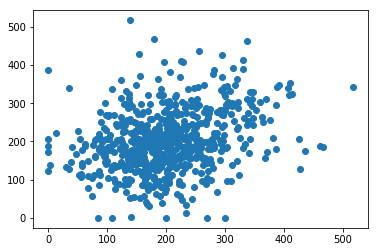

In [24]:
plt.scatter(df_agg['energy'].shift(-8), df_agg['energy'])

,energy,energy_prev_1,energy_prev_2,energy_prev_3,energy_prev_4,energy_prev_5,energy_prev_6
6,339.39,192.39,295.22,110.14,182.25,192.29,218.31
7,286.65,339.39,192.39,295.22,110.14,182.25,192.29
8,188.30,286.65,339.39,192.39,295.22,110.14,182.25
9,198.49,188.30,286.65,339.39,192.39,295.22,110.14
10,272.43,198.49,188.30,286.65,339.39,192.39,295.22
11,66.90,272.43,198.49,188.30,286.65,339.39,192.39
12,301.33,66.90,272.43,198.49,188.30,286.65,339.39
13,293.82,301.33,66.90,272.43,198.49,188.30,286.65
14,247.13,293.82,301.33,66.90,272.43,198.49,188.30
15,250.54,247.13,293.82,301.33,66.90,272.43,198.49


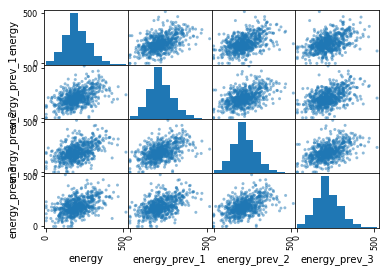

In [25]:
from pandas.plotting import scatter_matrix
df_temp = pd.DataFrame()
df_temp['energy'] = df_agg['energy']
for x in range(1, 7):
    df_temp[f'energy_prev_{x}'] = df_temp['energy'].shift(x)
scatter_matrix(df_temp[['energy', 'energy_prev_1', 'energy_prev_2', 'energy_prev_3']])
df_temp.dropna().head(10)

In [26]:
df_agg = preproc_df.groupby(['name', 'date']).agg('sum').reset_index()
df_agg['day_of_week'] = pd.to_datetime(df_agg['date']).dt.day_name()
df_agg['month'] = pd.to_datetime(df_agg['date']).dt.month_name()

for col in ['day_of_week', 'month']:
    df_agg[col] = df_agg[col].astype('category')
    
df_agg = df_agg.join(pd.get_dummies(df_agg.select_dtypes('category')))
df_agg = df_agg.drop(df_agg.select_dtypes('category'), axis=1)

# df_agg.columns = df_agg.columns.to_flat_index()
# df_agg.columns

# for x in range(1, 7):
#     df_agg[f'energy_prev_{x}'] = df_agg['energy'].shift(x)
# df_agg = df_agg.dropna()
# df_agg.head()

stations = [g for _, g in df_agg.groupby('name')]

def offset_col_x_days(df, col, days):
    for x in range(1, days):
        df[f'{col}_prev_{7+x}'] = df[col].shift(7+x)
    df = df.dropna().reset_index(drop=True)
    return df

for i in range(len(stations)):
    for col in ['energy', 'on_peak', 'mid_day', 'off_peak', 'error_rounding', 'error_calculation', 'session_type_DEVICE', 'session_type_MOBILE', 'session_type_WEB',
       'port_type_CHADEMO', 'port_type_DCCOMBOTYP1', 'payment_mode_CREDITCARD',
       'payment_mode_RFID']:
        stations[i] = offset_col_x_days(stations[i], col, 7)
stations[0]

,name,date,energy,on_peak,mid_day,off_peak,correct_amount,error_rounding,error_calculation,session_type_DEVICE,...,payment_mode_CREDITCARD_prev_10,payment_mode_CREDITCARD_prev_11,payment_mode_CREDITCARD_prev_12,payment_mode_CREDITCARD_prev_13,payment_mode_RFID_prev_8,payment_mode_RFID_prev_9,payment_mode_RFID_prev_10,payment_mode_RFID_prev_11,payment_mode_RFID_prev_12,payment_mode_RFID_prev_13
0,A,2019-02-17,229.85,8.0,8.0,4.0,119.41,0.0,2.0,4,...,10.0,9.0,9.0,4.0,4.0,4.0,7.0,3.0,2.0,0.0
1,A,2019-02-18,189.50,3.0,13.0,3.0,97.87,0.0,2.0,6,...,6.0,10.0,9.0,9.0,11.0,4.0,4.0,7.0,3.0,2.0
2,A,2019-02-19,193.40,3.0,7.0,5.0,100.36,0.0,3.0,4,...,11.0,6.0,10.0,9.0,7.0,11.0,4.0,4.0,7.0,3.0
3,A,2019-02-20,189.90,4.0,13.0,2.0,97.95,0.0,1.0,11,...,3.0,11.0,6.0,10.0,7.0,7.0,11.0,4.0,4.0,7.0
4,A,2019-02-21,252.41,3.0,5.0,2.0,131.23,0.0,1.0,4,...,6.0,3.0,11.0,6.0,7.0,7.0,7.0,11.0,4.0,4.0
5,A,2019-02-22,201.17,7.0,10.0,4.0,105.24,0.0,0.0,7,...,7.0,6.0,3.0,11.0,6.0,7.0,7.0,7.0,11.0,4.0
6,A,2019-02-23,148.30,3.0,24.0,0.0,74.23,0.0,2.0,3,...,8.0,7.0,6.0,3.0,5.0,6.0,7.0,7.0,7.0,11.0
7,A,2019-02-24,152.86,3.0,25.0,4.0,77.88,0.0,0.0,11,...,14.0,8.0,7.0,6.0,9.0,5.0,6.0,7.0,7.0,7.0
8,A,2019-02-25,182.11,2.0,15.0,22.0,91.97,0.0,0.0,13,...,15.0,14.0,8.0,7.0,8.0,9.0,5.0,6.0,7.0,7.0
9,A,2019-02-26,220.13,7.0,15.0,8.0,117.33,0.0,2.0,13,...,15.0,15.0,14.0,8.0,2.0,8.0,9.0,5.0,6.0,7.0


In [27]:
from datetime import timedelta
test_stations = []
for station in stations:
    most_recent_session = station['date'].values[-1]
    
    test_station = pd.DataFrame()
    test_station['date'] = pd.Series([most_recent_session + timedelta(days=x) for x in range(1, 8)])
    for col in ['energy', 'on_peak', 'mid_day', 'off_peak', 'error_rounding', 'error_calculation', 'session_type_DEVICE', 'session_type_MOBILE', 'session_type_WEB',
       'port_type_CHADEMO', 'port_type_DCCOMBOTYP1', 'payment_mode_CREDITCARD',
       'payment_mode_RFID']:
        for x in range(1, 7):
            test_station[f'{col}_prev_{7+x}'] = station[col].shift(7+x).values[-7:]
    test_station = test_station.dropna().reset_index(drop=True)
    test_station['day_of_week'] = pd.to_datetime(test_station['date']).dt.day_name()
    test_station['month'] = pd.to_datetime(test_station['date']).dt.month_name()
    for col in ['day_of_week', 'month']:
        test_station[col] = test_station[col].astype('category')
        
    months = set([
        'month_April',
        'month_August',
        'month_December',
        'month_February',
        'month_January',
        'month_July',
        'month_June',
        'month_March',
        'month_May',
        'month_November',
        'month_October'
    ])
    test_station = test_station.join(pd.get_dummies(test_station.select_dtypes('category')))
    test_station = test_station.drop(test_station.select_dtypes('category'), axis=1)
    months = months - set(test_station.columns)
    months_df = pd.DataFrame()
    for month in months:
        months_df[month] = [0] * 7
    test_station = test_station.join(months_df)
    test_stations.append(test_station)

In [28]:
test_stations[0]

,date,energy_prev_8,energy_prev_9,energy_prev_10,energy_prev_11,energy_prev_12,energy_prev_13,on_peak_prev_8,on_peak_prev_9,on_peak_prev_10,...,month_June,month_October,month_May,month_July,month_February,month_January,month_December,month_April,month_November,month_August
0,2019-09-01,410.51,298.40,345.74,293.43,298.56,294.49,6.0,8.0,4.0,...,0,0,0,0,0,0,0,0,0,0
1,2019-09-02,273.44,410.51,298.40,345.74,293.43,298.56,6.0,6.0,8.0,...,0,0,0,0,0,0,0,0,0,0
2,2019-09-03,391.31,273.44,410.51,298.40,345.74,293.43,6.0,6.0,6.0,...,0,0,0,0,0,0,0,0,0,0
3,2019-09-04,255.94,391.31,273.44,410.51,298.40,345.74,7.0,6.0,6.0,...,0,0,0,0,0,0,0,0,0,0
4,2019-09-05,173.32,255.94,391.31,273.44,410.51,298.40,3.0,7.0,6.0,...,0,0,0,0,0,0,0,0,0,0
5,2019-09-06,303.64,173.32,255.94,391.31,273.44,410.51,3.0,3.0,7.0,...,0,0,0,0,0,0,0,0,0,0
6,2019-09-07,304.24,303.64,173.32,255.94,391.31,273.44,6.0,3.0,3.0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
from sklearn.ensemble import RandomForestRegressor


y_preds = []
for X_train, X_test in zip(stations, test_stations):
    y = X_train[['energy', 'error_rounding', 'error_calculation', 'on_peak', 'mid_day', 'off_peak', 'port_type_CHADEMO', 'port_type_DCCOMBOTYP1', 'payment_mode_CREDITCARD',
           'payment_mode_RFID', 'session_type_DEVICE', 'session_type_MOBILE', 'session_type_WEB']]
    
    X_train = X_train.drop(['name', 'date', 'correct_amount', 'correct_duration', 'energy', 'on_peak', 'mid_day', 'off_peak', 'error_rounding', 'error_calculation', 'session_type_DEVICE', 'session_type_MOBILE', 'session_type_WEB',
           'port_type_CHADEMO', 'port_type_DCCOMBOTYP1', 'payment_mode_CREDITCARD',
           'payment_mode_RFID'], axis=1)
    
    X_train = X_train.reindex(sorted(X_train.columns), axis=1)
    
    date_test = X_test['date']
    X_test = X_test.drop(['date'], axis=1)
    X_test = X_test.reindex(sorted(X_test.columns), axis=1)
    
    clf = RandomForestRegressor()
    clf.fit(X_train, y)
    y_pred = clf.predict(X_test)
    y_preds.append(y_pred)
    


D:\Users\seany\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\seany\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [30]:
# # from sklearn.utils import check_arrays
# def mape(y_true, y_pred): 
# #     y_true, y_pred = check_arrays(y_true, y_pred)

#     ## Note: does not handle mix 1d representation
#     #if _is_1d(y_true): 
#     #    y_true, y_pred = _check_1d_array(y_true, y_pred)

#     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# mape(y_test, y_pred)

In [31]:
all_predictions = []
for y_pred in y_preds:
    predictions = [[] for j in range(len(y_pred[0]))]
    # Each date
    for i in range(len(y_pred)):
        # Each field
        for j in range(len(y_pred[i])):
            # Create list of just that field
            predictions[j].append(y_pred[i][j])
    all_predictions.append(predictions)

In [32]:
all_predictions[0]

[[231.71999999999997,
  269.08599999999996,
  284.982,
  336.412,
  264.592,
  274.745,
  245.055],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.6, 1.9, 3.8, 2.7, 2.1, 2.5, 2.1],
 [4.6, 4.8, 6.3, 5.3, 4.9, 3.6, 4.0],
 [10.7, 10.2, 10.7, 10.3, 9.6, 10.9, 13.0],
 [2.8, 5.1, 6.7, 6.9, 4.7, 6.1, 3.9],
 [16.1, 17.8, 21.5, 20.4, 16.7, 17.1, 17.9],
 [2.0, 2.3, 2.2, 2.1, 2.5, 3.5, 3.0],
 [11.1, 12.2, 13.0, 13.0, 10.9, 12.6, 13.5],
 [7.0, 7.9, 10.7, 9.5, 8.3, 8.0, 7.4],
 [8.6, 6.9, 11.1, 8.9, 9.3, 6.2, 9.4],
 [9.0, 12.3, 11.8, 13.4, 9.1, 13.5, 11.0],
 [0.5, 0.9, 0.8, 0.2, 0.8, 0.9, 0.5]]

In [33]:
for j in range(len(all_predictions)):
    predictions = all_predictions[j]
    for i in range(len(predictions[1])):
        predictions[1][i] = 0 if predictions[1][i] < 0 else predictions[1][i] 
    for i in range(len(predictions[2])):
        predictions[2][i] = 0 if predictions[2][i] < 0 else predictions[2][i]
    predictions[0] = np.round(predictions[0], 2)
    for i in range(1, len(predictions)):
        predictions[i] = np.round(predictions[i])
    all_predictions[j] = predictions
    

In [34]:
for p in all_predictions[0]:
    print(len(p))

7
7
7
7
7
7
7
7
7
7
7
7
7


In [35]:
len(all_predictions[0])

13

In [36]:
df_test = pd.DataFrame()
station_names = ['A','B']
for predictions, station_name in zip(all_predictions, station_names):
    df = pd.DataFrame({
        'name': [station_name] * len(predictions[0]),
        'date': date_test, 
        'energy': predictions[0], 
        'error_rounding': predictions[1], 
        'error_calculation': predictions[2],
        'on_peak': predictions[3],
        'mid_day': predictions[4],
        'off_peak': predictions[5],
        'port_type_CHADEMO': predictions[6],
        'port_type_DCCOMBOTYP1': predictions[7],
        'payment_mode_CREDITCARD': predictions[8],
        'payment_mode_RFID': predictions[9],
        'session_type_DEVICE': predictions[10], 
        'session_type_MOBILE': predictions[11],
        'session_type_WEB': predictions[12],
    })
    df_test = df_test.append(df)
df_test

,name,date,energy,error_rounding,error_calculation,on_peak,mid_day,off_peak,port_type_CHADEMO,port_type_DCCOMBOTYP1,payment_mode_CREDITCARD,payment_mode_RFID,session_type_DEVICE,session_type_MOBILE,session_type_WEB
0,A,2019-09-01,231.72,0.0,2.0,5.0,11.0,3.0,16.0,2.0,11.0,7.0,9.0,9.0,0.0
1,A,2019-09-02,269.09,0.0,2.0,5.0,10.0,5.0,18.0,2.0,12.0,8.0,7.0,12.0,1.0
2,A,2019-09-03,284.98,0.0,4.0,6.0,11.0,7.0,22.0,2.0,13.0,11.0,11.0,12.0,1.0
3,A,2019-09-04,336.41,0.0,3.0,5.0,10.0,7.0,20.0,2.0,13.0,10.0,9.0,13.0,0.0
4,A,2019-09-05,264.59,0.0,2.0,5.0,10.0,5.0,17.0,2.0,11.0,8.0,9.0,9.0,1.0
5,A,2019-09-06,274.74,0.0,2.0,4.0,11.0,6.0,17.0,4.0,13.0,8.0,6.0,14.0,1.0
6,A,2019-09-07,245.06,0.0,2.0,4.0,13.0,4.0,18.0,3.0,14.0,7.0,9.0,11.0,0.0
0,B,2019-09-01,163.08,0.0,2.0,4.0,8.0,2.0,14.0,0.0,7.0,7.0,8.0,6.0,0.0
1,B,2019-09-02,167.76,0.0,2.0,3.0,11.0,2.0,16.0,0.0,11.0,6.0,8.0,8.0,1.0
2,B,2019-09-03,139.74,0.0,1.0,3.0,9.0,2.0,13.0,0.0,8.0,5.0,5.0,8.0,0.0


In [37]:
df_test_agg = df_test.groupby(['date']).agg('sum').reset_index()
df_test_agg

,date,energy,error_rounding,error_calculation,on_peak,mid_day,off_peak,port_type_CHADEMO,port_type_DCCOMBOTYP1,payment_mode_CREDITCARD,payment_mode_RFID,session_type_DEVICE,session_type_MOBILE,session_type_WEB
0,2019-09-01,394.80,0.0,4.0,9.0,19.0,5.0,30.0,2.0,18.0,14.0,17.0,15.0,0.0
1,2019-09-02,436.85,0.0,4.0,8.0,21.0,7.0,34.0,2.0,23.0,14.0,15.0,20.0,2.0
2,2019-09-03,424.72,0.0,5.0,9.0,20.0,9.0,35.0,2.0,21.0,16.0,16.0,20.0,1.0
3,2019-09-04,472.24,0.0,3.0,7.0,16.0,9.0,29.0,2.0,20.0,13.0,13.0,18.0,0.0
4,2019-09-05,474.16,0.0,6.0,9.0,19.0,8.0,33.0,2.0,20.0,15.0,17.0,17.0,1.0
5,2019-09-06,486.91,0.0,3.0,9.0,19.0,8.0,31.0,4.0,22.0,14.0,15.0,19.0,1.0
6,2019-09-07,391.32,0.0,4.0,5.0,22.0,6.0,31.0,3.0,21.0,13.0,17.0,15.0,1.0


In [40]:
df_test_agg['energy'] = np.round(df_test_agg['energy'], 2)

In [41]:
df_test_agg.to_csv('test_run.csv',index=False)